In [42]:
import numpy as np
import pandas as pd
from scipy import stats
import pylab
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.diagnostic import lilliefors
# %matplotlib inline
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)
simplefilter(action = 'ignore', category=RuntimeWarning)

In [2]:
pahaw_x = pd.read_csv('PaHaW_X_nor.csv')
pahaw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']

pahaw_X = np.array(pahaw_x)
pahaw_y =pd.read_csv('PaHaW_y.csv')
pahaw_y.columns = ['result']

In [3]:
pahaw = pd.concat([pahaw_x,pahaw_y], axis=1)

In [17]:
pahaw_hc = pahaw.loc[pahaw['result'] == 0]

In [2]:
pahaw_x = pd.read_csv('PaHaW_fft_X.csv')
pahaw_x.columns = ['vel', 'pre']
pahaw_X = np.array(pahaw_x)
pahaw_y =pd.read_csv('PaHaW_fft_y.csv')
pahaw_y.columns = ['result']

In [8]:
hw_x = pd.read_csv('HW_X_nor.csv')
hw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']
hw_X = np.array(hw_x)
hw_y = pd.read_csv('HW_y.csv')
hw_y.columns = ['result']

In [9]:
hw = pd.concat([hw_x,hw_y], axis=1)
hw_hc = hw.loc[hw['result'] == 0]

In [6]:
hw_x = pd.read_csv('HW_fft_X.csv')
hw_x.columns = ['vel', 'pre']
hw_X = np.array(hw_x)
hw_y = pd.read_csv('HW_fft_y.csv')
hw_y.columns = ['result']

In [44]:
c_x = pd.read_csv('combine_X_nor.csv')
c_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']

# c_X = np.array(c_x)
c_y = pd.read_csv('combine_y_nor.csv')
c_y.columns =['result']

In [45]:
#1 -- PaHaW
#2 -- Parkinson_HW
df1 = c_x.iloc[:67, :].values
pahaw_x = pd.DataFrame(df1)
pahaw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']

df2 = c_x.iloc[67:, :].values
hw_x = pd.DataFrame(df2)
hw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']


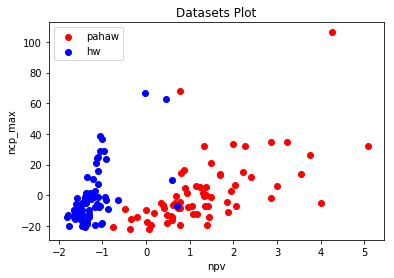

In [46]:
#entropy_S, duration, ncp_max, ncp_min are comparable

feature1 = df1[:,3].astype(float)
feature2 = df1[:,25].astype(float)
feature3 = df2[:, 3].astype(float)
feature4 = df2[:, 25].astype(float)

plt.scatter(feature1, feature2, c='r', label='pahaw')
plt.scatter(feature3, feature4, c='b', label='hw')
plt.xlabel(c_x.columns[3])
plt.ylabel(c_x.columns[25])
plt.title('Datasets Plot')
plt.legend()
plt.show()

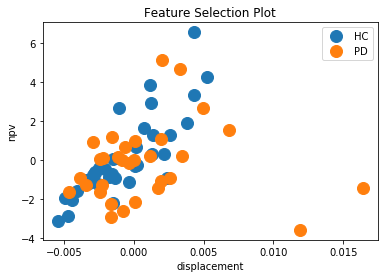

In [33]:
df = pd.DataFrame(dict(x=pahaw_x['displacement'], y=pahaw_x['npv'], label=pahaw_y['result']))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    if name == 0:
        temp = 'HC'
    else:
        temp = 'PD'
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=temp)
ax.set_xlabel('displacement')
ax.set_ylabel('npv')
ax.set_title('Feature Selection Plot')
ax.legend()

plt.show()

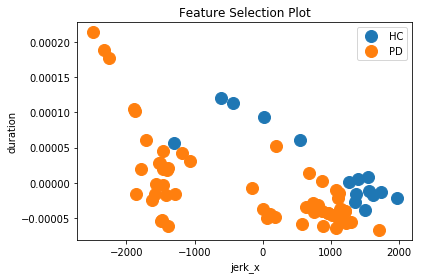

In [24]:
df = pd.DataFrame(dict(x=hw_x['jerk_x'], y=hw_x['duration'], label=hw_y['result']))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    if name == 0:
        temp = 'HC'
    else:
        temp = 'PD'
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=temp)
ax.set_xlabel('jerk_x')
ax.set_ylabel('duration')
ax.set_title('Feature Selection Plot')
ax.legend()

plt.show()

In [7]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from scipy.stats import spearmanr

# calculate spearman's correlation
for column in pahaw_x:
    coef, p = spearmanr(pahaw_x[column], pahaw_y['result'])
#     print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
    alpha = 0.05
    if p > alpha:
        print(column +  ' p=%.3f' % p)
    else:
        print(column + ' Samples are correlated (reject H0) p=%.3f' % p)
        
for column in hw_x:
    coef, p = spearmanr(hw_x[column], hw_y['result'])
#     print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
    alpha = 0.05
    if p > alpha:
        print(column +  ' p=%.3f' % p)
    else:
        print(column + ' Samples are correlated (reject H0) p=%.3f' % p)
        

vel p=0.453
pre p=0.613
vel p=0.810
pre Samples are correlated (reject H0) p=0.002


In [11]:
#for sample size over 50 up to 300 (PaHaW)
for column in pahaw_x:
    
    ksstat, p_value= lilliefors(pahaw_hc[column])
    if p_value < 0.1:
        print ("data are not normal distributed")
    else:
        print (column, "data are normal distributed")


data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
data are not normal distributed
std_pre data are normal distributed
std_grip data are normal distributed
data are not normal distributed
duration data are normal distri

In [12]:
#for sample size over 50 up to 300 (Parkinson_HW)
for column in hw_x:
    
    ksstat, p_value= lilliefors(hw_hc[column])
    if p_value < 0.1:
        print ("data are not normal distributed")
    else:
        print (column, "data are normal distributed")


data are not normal distributed
data are not normal distributed
nvv data are normal distributed
npv data are normal distributed
data are not normal distributed
data are not normal distributed
jerk data are normal distributed
nca_max_x data are normal distributed
nca_max_y data are normal distributed
nca_min_x data are normal distributed
nca_min_y data are normal distributed
nca_max data are normal distributed
nca_min data are normal distributed
ncv_max_x data are normal distributed
ncv_max_y data are normal distributed
ncv_min_x data are normal distributed
ncv_min_y data are normal distributed
ncv_max data are normal distributed
data are not normal distributed
ncv_nca_max_x data are normal distributed
ncv_nca_max_y data are normal distributed
ncv_nca_min_x data are normal distributed
ncv_nca_min_y data are normal distributed
ncv_nca_max data are normal distributed
ncv_nca_min data are normal distributed
ncp_max data are normal distributed
ncp_min data are normal distributed
std_pre dat

In [7]:
import statistics
statistics.pstdev(pahaw_x.iloc[:,31])

0.9781688869681364

In [14]:
#Anova test for std_pre, std_grip, entropy_S, grip_iqr

r, p_entropy_s = stats.f_oneway(pahaw_hc['std_pre'], hw_hc['std_pre'])
print(p_entropy_s > 0.05)

r, p_entropy_s = stats.f_oneway(pahaw_hc['std_grip'], hw_hc['std_grip'])
print(p_entropy_s > 0.05)

r, p_entropy_s = stats.f_oneway(pahaw_hc['entropy_S'], hw_hc['entropy_S'])
print(p_entropy_s > 0.05)

r, p_entropy_s = stats.f_oneway(pahaw_hc['grip_iqr'], hw_hc['grip_iqr'])
print(p_entropy_s > 0.05)


# stats.kruskal(pahaw_x.iloc[:,31], hw_x.iloc[:,31])


False
True
False
True


In [15]:
#two-sample Kolmogorov-Smirnov test for other features
from scipy.stats import ks_2samp

result = []

for i in range(len(hw_hc.columns)):

#         value = []
    stats, p_value = ks_2samp(pahaw_hc.iloc[:,i], hw_hc.iloc[:,i])
    result.append([i, stats, p_value])
        


In [16]:
kol_result = pd.DataFrame(result)
kol_result.columns = ['feature id', 'statistics', 'P value']
        
kol_result.loc[kol_result['P value'] > 0.05]

,feature id,statistics,P value
3,3,0.172222,0.881148
25,25,0.361111,0.096750
26,26,0.361111,0.096750
30,30,0.394444,0.053908
41,41,0.000000,1.000000


entropy_S, duration, NCP_max, NCP_min are not significantly different

In [29]:
# X = np.array(final_data[["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'mv', 'sdv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']])
X = np.array(c_x[['ncp_max', 'ncp_min', 'duration', 'npv', 'std_grip', 'grip_iqr']])
y = np.array(c_y['result'])

In [17]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

In [41]:
## 10-FOLD
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib
from matplotlib import pyplot as plt
import scipy


#y = final_data['result']
#X = final_data.drop(['ID', 'result'], axis=1)

kf = KFold(n_splits=10, shuffle=True)
#print(kf)

acc = []
pre = []
rec = []
# clf = LogisticRegression()
# clf = tree.DecisionTreeClassifier()
# clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# clf = GaussianNB()
clf = SVC(kernel = 'rbf',  gamma=0.7, C=1.0)

predict=[]
test=[]

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(test_index)
    
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
    print('True:', y_test)
    print('False:', pred)
    
    for a in y_test:
        test.append(a)
    for b in pred:
        predict.append(b)    
    
print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

print(metrics.confusion_matrix(test, predict))

# plot_decision_boundary(test, predict)


[  5   7  12  15  18  31  54  61  86 116 127 133 134 136]
True: [1 1 1 1 0 1 0 0 1 1 1 1 1 1]
False: [1 1 1 1 0 0 1 1 1 1 1 1 1 1]
[ 26  35  38  43  50  84  89  99 101 103 111 112 124 126]
True: [1 0 1 0 1 1 1 1 1 1 1 1 1 1]
False: [0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 39  51  52  53  65  71  78  79  82  88 102 104 109 110]
True: [0 0 1 1 0 0 0 0 1 1 1 1 1 1]
False: [1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[  0   4  10  28  41  46  49  64  70  72  91  93 118 129]
True: [1 1 1 0 0 0 1 0 0 0 1 1 1 1]
False: [0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[ 21  22  37  56  59  60  74  76  83  90 106 120 122 128]
True: [0 0 1 0 0 0 0 0 1 1 1 1 1 1]
False: [1 1 1 1 1 1 1 1 1 1 0 1 0 1]
[  9  17  19  30  47  48  77  81  85  95 107 123 137 138]
True: [1 0 0 1 0 0 0 0 1 1 1 1 1 1]
False: [1 1 1 0 1 0 1 1 1 1 1 1 1 1]
[  1   2   3   6  16  25  62  66  67  73  75  80  97 113]
True: [1 1 1 1 1 1 0 1 0 0 0 0 1 1]
False: [1 0 0 1 0 1 1 0 1 1 1 1 1 1]
[ 13  14  23  24  27  34  40  42  55  58  63  94 108 131]
True: [1 1 0 1 0 0 0 0 0 